In [1]:
from scipy import interpolate

from scipy.interpolate import interp2d

from scipy.spatial import Delaunay

from skimage.draw import polygon

from moviepy.editor import ImageSequenceClip

import numpy as np

import skimage as sk
import skimage.io as skio



from PIL import Image as im

import glob


import math

import cv2

import PyQt5

In [2]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display_grid_of_images(array_of_images, array_of_names, w = 6, h = 5, normalize_rgb = False):
    num_rows = len(array_of_images)
    num_cols = len(array_of_images[0])
    
    assert len(array_of_names) == num_rows, "same num of rows for names and images"
    
    assert all([len(row) == num_cols for row in array_of_images]), "all rows need to be same length"
    assert all([len(row) == num_cols for row in array_of_names]), "all rows need to be same length for strings too"
    
    fig = plt.figure(figsize=(w * num_cols, h * num_rows))
    subplots = fig.subplots(num_rows, num_cols)
    
    for row in range(num_rows):
        for col in range(num_cols):
            
            ax = subplots[row, col]
            ax.set_title(array_of_names[row][col])
            pixels = array_of_images[row][col]
            
            if len(pixels.shape) == 2:
                # grayscale (scalars)
                ax.imshow(pixels,cmap='Greys_r')
            if len(pixels.shape) == 3:
                # rgb
                if normalize_rgb:
                    # gotta normalize the rgb ones too!
                    pixels = pixels - np.min(pixels)
                    pixels = pixels / np.max(pixels)
                ax.imshow(pixels)
def display_dictionary_of_images(dic, prefix = '', horiz = False, w = 6, h = 5, normalize_rgb = False):
    %matplotlib inline
    
    if horiz:
    
        fig = plt.figure(figsize=(w * len(dic), h))
        try:
            subplots = list(fig.subplots(1, len(dic)))
        except:
            subplots = [fig.subplots(1, len(dic))]
    else:
        fig = plt.figure(figsize=(w, h * len(dic)))
        try:
            subplots = list(fig.subplots(len(dic), 1))
        except:
            subplots = [fig.subplots(len(dic), 1)]
    
    keylist = list(dic.keys())
    
    for i in range(len(dic)):
        key = keylist[i]      
        pixels = dic[key]

        #Display the image
        ax = subplots[i]
        ax.set_title(prefix + ' ' + key)
        if len(pixels.shape) == 2:
            # grayscale (scalars)
            ax.imshow(pixels,cmap='Greys_r')
        if len(pixels.shape) == 3:
            # rgb
            # gotta normalize the rgb ones too!
            if normalize_rgb:
                pixels = pixels - np.min(pixels)
                pixels = pixels / np.max(pixels)
            ax.imshow(pixels)

In [4]:
me = sk.img_as_float(skio.imread('data/me.png'))
meryl = sk.img_as_float(skio.imread('data/meryl.png'))

In [5]:
# %matplotlib qt
# plt.imshow(me)
# pts = np.asarray(plt.ginput(-1, timeout=60))

In [6]:
pts_me = np.array([[153.28787879, 438.89393939],
       [196.57792208, 260.32251082],
       [323.74242424, 165.62554113],
       [467.14069264, 152.0974026 ],
       [602.42207792, 271.14502165],
       [651.12337662, 452.42207792],
       [131.64285714, 484.88961039],
       [653.82900433, 501.12337662],
       [161.4047619 , 563.35281385],
       [648.41774892, 571.46969697],
       [196.57792208, 382.07575758],
       [266.92424242, 357.72510823],
       [350.7987013 , 382.07575758],
       [459.02380952, 379.37012987],
       [548.30952381, 349.60822511],
       [607.83333333, 376.66450216],
       [234.45670996, 441.5995671 ],
       [299.39177489, 425.36580087],
       [334.56493506, 455.12770563],
       [469.84632035, 447.01082251],
       [526.66450216, 422.66017316],
       [580.77705628, 441.5995671 ],
       [293.98051948, 449.71645022],
       [521.25324675, 441.5995671 ],
       [277.74675325, 468.65584416],
       [529.37012987, 463.24458874],
       [410.32251082, 465.95021645],
       [326.44805195, 614.75974026],
       [491.49134199, 612.05411255],
       [361.62121212, 628.28787879],
       [445.495671  , 628.28787879],
       [402.20562771, 649.93290043],
       [302.0974026 , 717.57359307],
       [407.61688312, 698.63419913],
       [496.9025974 , 714.86796537],
       [404.91125541, 739.21861472],
       [407.61688312, 777.0974026 ],
       [196.57792208, 744.62987013],
       [594.30519481, 741.92424242],
       [358.91558442, 904.26190476],
       [450.90692641, 904.26190476],
       [ 99.17532468, 874.5       ],
       [753.93722944, 814.97619048],
       [1 , 1 ],
       [799, 1],
       [1, 999],
       [799, 999]])

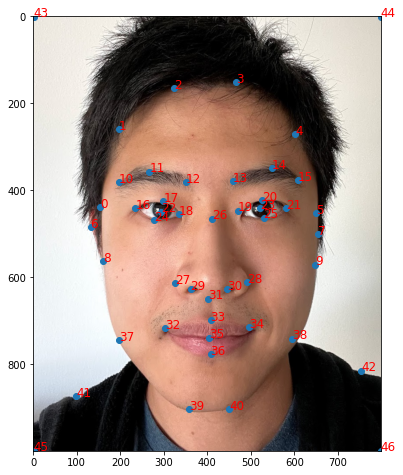

In [7]:
%matplotlib inline
plt.figure(figsize = (7,8))
plt.imshow(me)
plt.scatter(*zip(*pts_me))
for idx, val in enumerate(pts_me):
    plt.text(val[0], val[1], str(idx), color="red", fontsize=12)

In [8]:
# %matplotlib qt
# plt.imshow(meryl)
# pts_meryl = np.asarray(plt.ginput(-1, timeout=120))

In [9]:
pts_meryl = np.array([[141.52594945, 443.83522958],
       [193.12997457, 230.04712553],
       [325.82603915, 136.66841342],
       [459.75077099, 131.75374436],
       [614.56284633, 261.99247441],
       [661.25220239, 469.63724213],
       [114.49526963, 540.89994348],
       [669.85287324, 538.44260895],
       [157.49862389, 619.53464842],
       [640.36485889, 613.39131209],
       [188.21530551, 400.83187531],
       [254.5633378 , 357.82852105],
       [336.88404453, 372.57252823],
       [468.35144184, 383.63053361],
       [564.18748848, 361.51452285],
       [617.02018086, 403.28920984],
       [234.90466156, 451.20723316],
       [280.36535035, 425.40522061],
       [344.25604811, 457.35056949],
       [469.58010911, 453.66456769],
       [523.64146875, 429.0912224 ],
       [577.70282839, 453.66456769],
       [282.82268488, 445.06389684],
       [521.18413422, 447.52123137],
       [280.36535035, 461.03657128],
       [524.87013601, 463.49390581],
       [398.31740776, 468.40857487],
       [340.57004632, 602.33330671],
       [469.58010911, 602.33330671],
       [360.22872255, 614.61997936],
       [440.09209475, 615.84864662],
       [397.08874049, 639.19332465],
       [312.31069923, 712.91336053],
       [408.14674587, 694.48335156],
       [506.44012704, 715.37069506],
       [414.2900822 , 719.05669685],
       [421.66208579, 768.20338744],
       [194.35864183, 752.230713  ],
       [608.41951001, 749.77337847],
       [351.6280517 , 891.0701139 ],
       [460.97943825, 892.29878116],
       [105.89459878, 920.55812825],
       [726.37156741, 931.61613363],
       [1 , 1 ],
       [799, 1],
       [1, 999],
       [799, 999]])

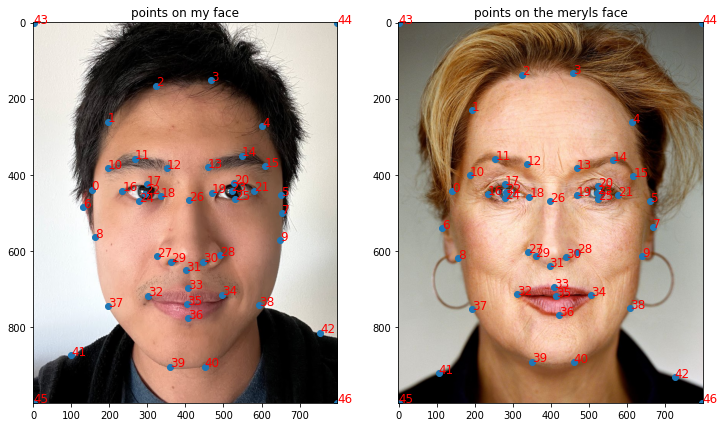

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(12, 7))
subplots = fig.subplots(1, 2)
ax0, ax1 = subplots[0], subplots[1]
ax0.set_title('points on my face')
ax1.set_title('points on the meryls face')
ax0.imshow(me)
ax1.imshow(meryl)
ax0.scatter(*zip(*pts_me))
ax1.scatter(*zip(*pts_meryl))
for i in range(len(pts_me)):
    val = pts_me[i]
    ax0.text(val[0], val[1], str(i), color="red", fontsize=12)
    val = pts_meryl[i]
    ax1.text(val[0], val[1], str(i), color="red", fontsize=12)

In [11]:
# get midway points

In [12]:
midway_points = []
for i in range(len(pts_me)):
    my_pt = pts_me[i]
    meryl_pt = pts_meryl[i]
    mid_pt = ((my_pt[0] + meryl_pt[0])/2, (my_pt[1] + meryl_pt[1])/2)
    midway_points.append(mid_pt)

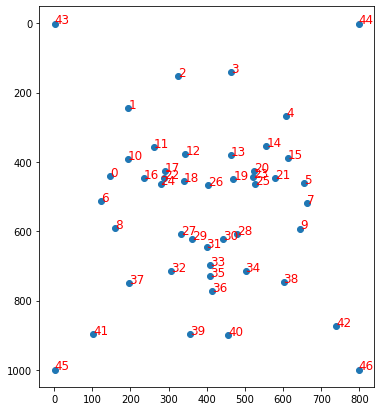

In [13]:
plt.figure(figsize=(6, 7))
plt.gca().invert_yaxis()
plt.scatter(*zip(*midway_points))
for idx, val in enumerate(midway_points):
    plt.text(val[0], val[1], str(idx), color="red", fontsize=12)

In [14]:
triangulation = Delaunay(midway_points)

Visualizing the triangles

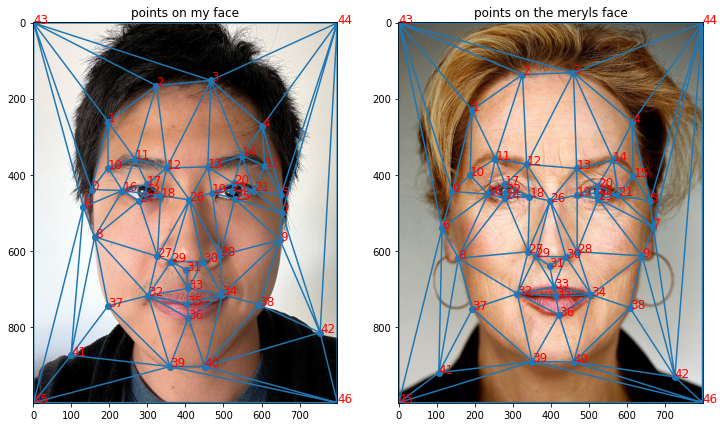

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(12, 7))
subplots = fig.subplots(1, 2)
ax0, ax1 = subplots[0], subplots[1]
ax0.set_title('points on my face')
ax1.set_title('points on the meryls face')
ax0.imshow(me)
ax1.imshow(meryl)
ax0.scatter(*zip(*pts_me))
ax1.scatter(*zip(*pts_meryl))
ax0.triplot(pts_me[:,0], pts_me[:,1], triangulation.simplices)
ax1.triplot(pts_meryl[:,0], pts_meryl[:,1], triangulation.simplices)
for i in range(len(pts_me)):
    val = pts_me[i]
    ax0.text(val[0], val[1], str(i), color="red", fontsize=12)
    val = pts_meryl[i]
    ax1.text(val[0], val[1], str(i), color="red", fontsize=12)

## Affine transformation from 6 points?

$$\begin{bmatrix}
x'\\ 
y'\\ 
1
\end{bmatrix} = 
\begin{bmatrix}
a &b  &c \\ 
d &e  &f \\ 
0 &0  &1 
\end{bmatrix}
\begin{bmatrix}
x\\ 
y\\ 
1
\end{bmatrix}$$

That is just for 2 points. We can modify it to solve for $a$ to $f$:

$$\begin{bmatrix}
Ax' & Bx' & Cx' \\ 
Ay' & By' & Cy' 
\end{bmatrix} = 
\begin{bmatrix}
a &b  &c \\ 
d &e  &f 
\end{bmatrix}
\begin{bmatrix}
Ax & Bx & Cx\\ 
Ay & By & Cy\\ 
1 & 1 & 1
\end{bmatrix}$$

To solve it with numpy, we need it in the format of $A \cdot x = b$ where $x$ is the matrix from $a$ to $f$

$$
\begin{bmatrix}
Ax & Ay & 1\\ 
Bx & By & 1\\ 
Cx & Cy & 1
\end{bmatrix}
\begin{bmatrix}
a & d\\
b & e\\
c & f
\end{bmatrix}
=
\begin{bmatrix}
Ax' & Ay' \\
Bx' & By' \\ 
Cx' & Cy' 
\end{bmatrix}
$$

Then, the transformation matrix is just the transposition of $x$, with 0,0,1 added to the bottom.

In [16]:
"""
get a affine transform matrix from a triangle
params:
1. simplex - the 3 indices connected by the triangle
2. pts_1 - original point coordinates
3. pts_2 - the new points

returns:
a matrix : ) 
"""
def computeAffine(simplex, pts_1, pts_2):
    orig_points = pts_1[simplex]

    new_points = pts_2[simplex]

    b = new_points
    A = np.hstack([orig_points, np.ones(3).reshape((3,1))])

    x = np.linalg.solve(A, b)

    tmx = np.vstack([x.T, [0,0,1]])
    return tmx

## Mid-way Face

In [17]:
ratio = 0.5

In [18]:
target_points = (pts_me * ratio) + (pts_meryl * (1 - ratio))

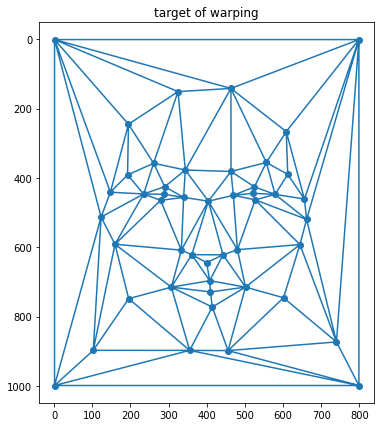

In [19]:
%matplotlib inline
plt.figure(figsize=(6, 7))
plt.title('target of warping')
plt.gca().invert_yaxis()
plt.scatter(*zip(*target_points))
plt.triplot(target_points[:,0], target_points[:,1], triangulation.simplices)
plt.show()

### Get my portion of the image

In [22]:
"""
use inverse warp to do one triangle, in one direction
params:
1. simplex - the 3 indices connected by the triangle
2. pts_1 - original point coordinates
3. pts_2 - the new points

returns:
a matrix : ) 
"""
def calculate_one_triangle(simplex, pts_1, pts_2, src_img, dest_img):
    
    # get the triangle corners
    orig_points = pts_1[simplex]
    new_points = pts_2[simplex]
    
    # get the polygon index for source and dest
    old_poly = polygon(orig_points[:,1], orig_points[:,0])
    newpoly = polygon(new_points[:,1], new_points[:,0])
    
    
    
    # get the pixel values for the old image
    r_old = src_img[:,:,0][old_poly]
    g_old = src_img[:,:,1][old_poly]
    b_old = src_img[:,:,2][old_poly]
    
    # get the inverse warp matrix
    tmx = computeAffine(simplex, pts_1, pts_2)
    tmx_i = np.linalg.inv(tmx)
    
    # do the inverse warp
    dest_pixels_matrix = np.vstack((newpoly[1], newpoly[0], np.ones(len(newpoly[0]))))
    inverse_warp = (tmx_i @ dest_pixels_matrix)[:2]
    print(old_poly[0].shape)
    print(old_poly[1].shape)
    print(r_old.size)
    # interpolate
    try:
        r_new = interpolate.griddata((old_poly), r_old, (inverse_warp[1], inverse_warp[0]), method='nearest')
    except:
        r_new = np.zeros(len(newpoly[0]))
    try:
        g_new = interpolate.griddata((old_poly), g_old, (inverse_warp[1], inverse_warp[0]), method='nearest')
    except:
        g_new = np.zeros(len(newpoly[0]))
    try:
        b_new = interpolate.griddata((old_poly), b_old, (inverse_warp[1], inverse_warp[0]), method='nearest')
    except:
        b_new = np.zeros(len(newpoly[0]))
    
    triangle = np.vstack((r_new, g_new,b_new)).T
    triangle = np.clip(triangle, 0, 1)
    
    #apply pixels to dest image
    dest_img[newpoly[0],newpoly[1]] = triangle


In [23]:
me_warped = np.zeros(me.shape, dtype = float)
meryl_warped = np.zeros(me.shape, dtype = float)
for idx, simplex in enumerate(triangulation.simplices):
    calculate_one_triangle(simplex, pts_me, target_points, me, me_warped)
    calculate_one_triangle(simplex, pts_meryl, target_points, meryl, meryl_warped)
    break


(65693,)
(65693,)
65693
(57134,)
(57134,)
57134


In [30]:
combined = me_warped*ratio + meryl_warped*(1-ratio)

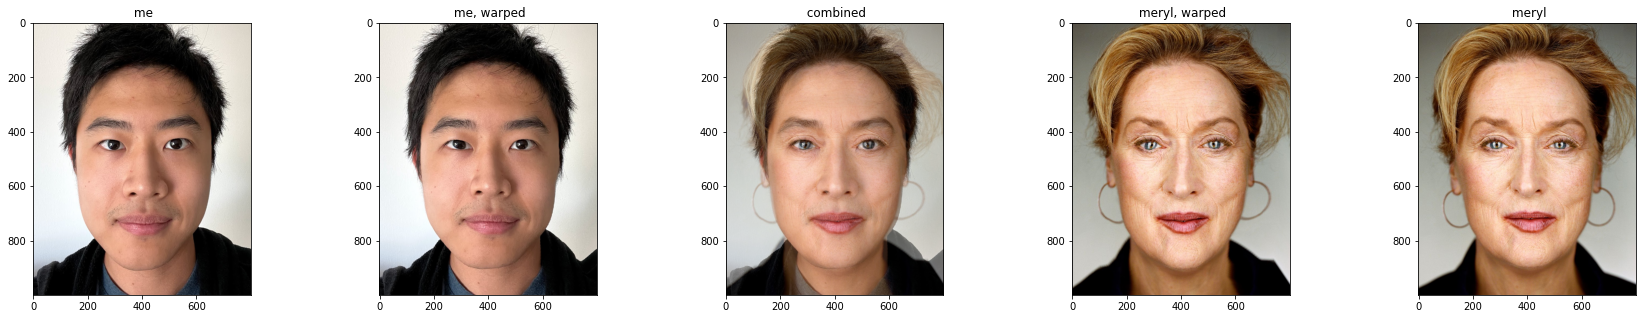

In [31]:
display_dictionary_of_images({
    'me': me,
    'me, warped':me_warped,
    'combined': combined,
    'meryl, warped': meryl_warped,
    'meryl': meryl}, horiz=True)

## The Morph Sequence

In [39]:
"""
this is the same code as the previous section, just with some names changed
"""

def morph(im1, im2, im1_pts, im2_pts, tri, warp_frac, dissolve_frac):
    
    assert im1.shape == im2.shape
    assert len(im1_pts) == len(im2_pts)

    target_points = (im1_pts * warp_frac) + (im2_pts * (1 - warp_frac))
    
    im1_warped = np.zeros(im1.shape, dtype = float)
    im2_warped = np.zeros(im1.shape, dtype = float)
    
    for idx, simplex in enumerate(tri.simplices):
        calculate_one_triangle(simplex, im1_pts, target_points, im1, im1_warped)
        calculate_one_triangle(simplex, im2_pts, target_points, im2, im2_warped)
        
    combined = im1_warped*dissolve_frac + im2_warped*(1-dissolve_frac)
    return combined

### Making the vid

In [33]:
list_of_frames = []
print('generating frames ', end='')
for idx, ratio in enumerate(np.linspace(1, 0, num=45)):
    print(idx, end = ' ')
    list_of_frames.append(morph(me, meryl, pts_me, pts_meryl, triangulation, ratio, ratio))
print('')

generating frames 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 


In [ ]:
for (idx, frame) in enumerate(list_of_frames):
    skio.imsave(f"animation/frame_{idx}.jpg", frame)

# Part 2

In [18]:
import pandas as pd

In [19]:
asf_files = glob.glob('data/danes/*.asf')

In [20]:
corner_points = np.array([[1 , 1 ],
                           [639, 1],
                           [1, 479],
                           [639, 479]])

In [21]:
dataset_images = []
for filename in asf_files:
    df = pd.read_csv(filename, sep='\t',skiprows=list(range(16)) + list(range(75,80)), header=None)
    points = np.array(df[[2,3]])
    points = points * [640, 480]
    points = np.vstack((points, corner_points))
    img_name = filename[:-4]+'.bmp'
    img = sk.img_as_float(skio.imread(img_name))
    dataset_images.append({
        'points':points,
        'image':img
    })

## Showing the points so I can accordingly highlight my own face

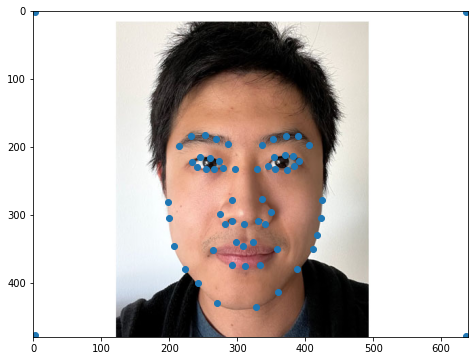

In [249]:
%matplotlib inline
example = dataset_images[8]
plt.figure(figsize = (8,6))
plt.imshow(me2)
plt.scatter(*zip(*pts_me2))


In [12]:
me2 = sk.img_as_float(skio.imread('data/me_pt2.jpg'))

In [13]:
# %matplotlib qt
# plt.imshow(me2)
# pts_me2 = np.asarray(plt.ginput(-1, timeout=-1))

In [16]:
pts_me2 = np.array([[197.3656068 , 280.61739557],
       [199.25916328, 305.23362986],
       [206.3600001 , 346.41848338],
       [223.40200845, 379.55572184],
       [241.86418417, 400.38484317],
       [270.74092054, 430.20835778],
       [327.07422593, 435.88902723],
       [359.26468616, 413.16634943],
       [387.66803341, 380.02911097],
       [410.86410034, 349.73220723],
       [417.96493715, 329.37647503],
       [422.69882836, 305.23362986],
       [424.11899572, 278.25044997],
       [390.98175726, 221.44375546],
       [382.46075308, 213.86952952],
       [369.67924682, 212.44936216],
       [354.05740583, 215.28969688],
       [345.06301253, 228.07120315],
       [355.47757319, 232.80509436],
       [373.46635979, 234.22526172],
       [383.88092045, 228.54459227],
       [233.34317999, 222.3905337 ],
       [245.17790801, 214.81630776],
       [259.85297076, 216.23647512],
       [273.10786615, 220.97036633],
       [278.7885356 , 230.91153787],
       [266.00702934, 233.27848348],
       [254.64569043, 233.27848348],
       [240.91740593, 229.96475963],
       [336.54200835, 197.77429941],
       [352.63723846, 188.30651699],
       [372.04619242, 184.51940402],
       [389.08820078, 184.0460149 ],
       [405.65682001, 196.82752117],
       [286.36276154, 195.88074293],
       [268.84736406, 188.30651699],
       [251.80535571, 183.09923666],
       [232.39640175, 184.0460149 ],
       [214.88100428, 198.24768853],
       [264.11347285, 351.62576371],
       [298.19748956, 340.26442481],
       [308.1386611 , 345.47170514],
       [323.76050209, 339.31764657],
       [358.31790792, 349.73220723],
       [333.70167363, 373.87505239],
       [311.92577407, 375.76860888],
       [292.51682011, 374.34844151],
       [296.7773222 , 232.33170524],
       [292.51682011, 278.25044997],
       [274.05464439, 298.60618217],
       [282.10225945, 313.28124491],
       [291.57004187, 308.54735371],
       [310.03221758, 312.80785579],
       [330.8613389 , 308.54735371],
       [341.27589956, 313.28124491],
       [349.79690374, 296.23923656],
       [336.54200835, 276.8302826 ],
       [328.96778242, 232.80509436],
       [  1.85589986,   1.79120335],
       [637.14410014,   1.31781422],
       [  1.85589986, 477.07388076],
       [637.14410014, 478.020659  ]])

## Getting the average face shape

In [25]:
pts_me2.shape

(62, 2)

In [32]:
avg_points = np.zeros(shape = (62,2), dtype = float)
for picture in dataset_images:
    pts = picture['points']
    pts_normalized = pts/len(dataset_images)
    avg_points += pts_normalized

Triangulate the average points

In [33]:
tri_danes = Delaunay(avg_points)

In [ ]:
plt.figure(figsize=(6, 7))
plt
plt.scatter(*zip(*midway_points))
for idx, val in enumerate(midway_points):
    plt.text(val[0], val[1], str(idx), color="red", fontsize=12)

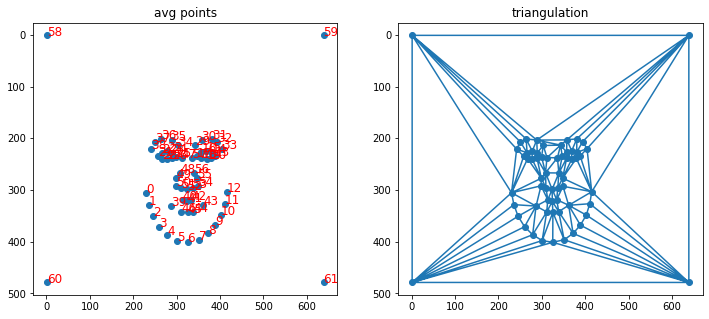

In [35]:
%matplotlib inline
fig = plt.figure(figsize=(12, 5))
subplots = fig.subplots(1, 2)
ax0, ax1 = subplots[0], subplots[1]
ax0.set_title('avg points')
ax1.set_title('triangulation')

ax0.invert_yaxis()
ax1.invert_yaxis()

ax0.scatter(*zip(*avg_points))
ax1.scatter(*zip(*avg_points))

ax1.triplot(avg_points[:,0], avg_points[:,1], tri_danes.simplices)
for i in range(len(avg_points)):
    val = avg_points[i]
    ax0.text(val[0], val[1], str(i), color="red", fontsize=12)


## Morphing faces to the mean

We could morph faces to the avg points by reusing the morph function from before. We can use the same image for both image parameters, but use the avg points for one of the points parameters

In [205]:
warped_to_avg = []

for example in dataset_images:
    print('boop', end=' ')
    img = example['image']
    pts = example['points']
    
    # warp fraction is 0 because we want to use entirely the second set of poitns
    # dissolve fraction is 1 because we want to use entirely the original pixels
    warped = morph(img, img, pts, avg_points, tri_danes, 0, 1)
    warped_to_avg.append(warped)
    
print('')

boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop boop 


## Lets see a few

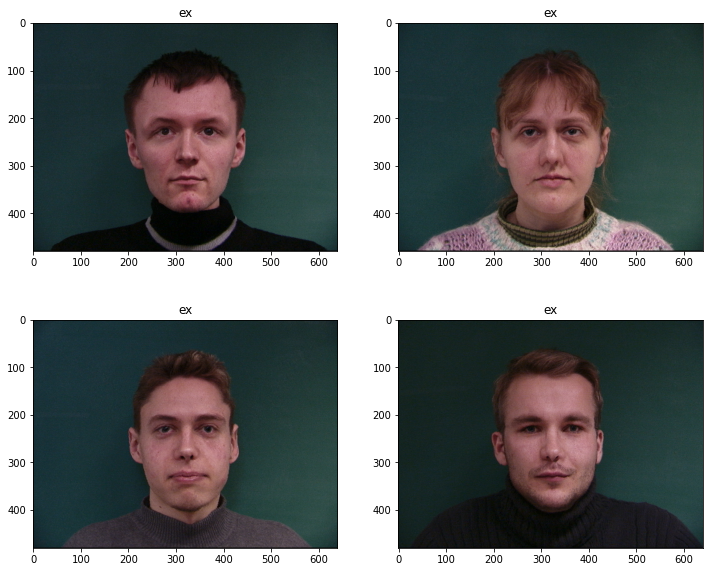

In [51]:
display_grid_of_images([[warped_to_avg[20], warped_to_avg[4]],[warped_to_avg[9],warped_to_avg[15]]], [['ex','ex'],['ex','ex']], w = 6, h = 5, normalize_rgb = False)

## Creating the mean face

In [52]:
mean_face = sum(warped_to_avg)/len(warped_to_avg)

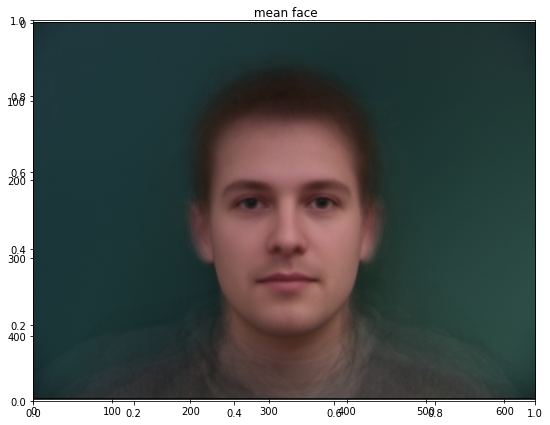

In [54]:
display_dictionary_of_images({'mean face':mean_face},w = 9, h=7)

## Getting myself involved

Morphing myself to the mean shape

In [55]:
my_face_mean_shape = morph(me2, me2, pts_me2, avg_points, tri_danes, 0, 1)

Morphing the mean face to my shape

In [56]:
mean_face_my_shape = morph(mean_face, mean_face, avg_points, pts_me2, tri_danes, 0, 1)

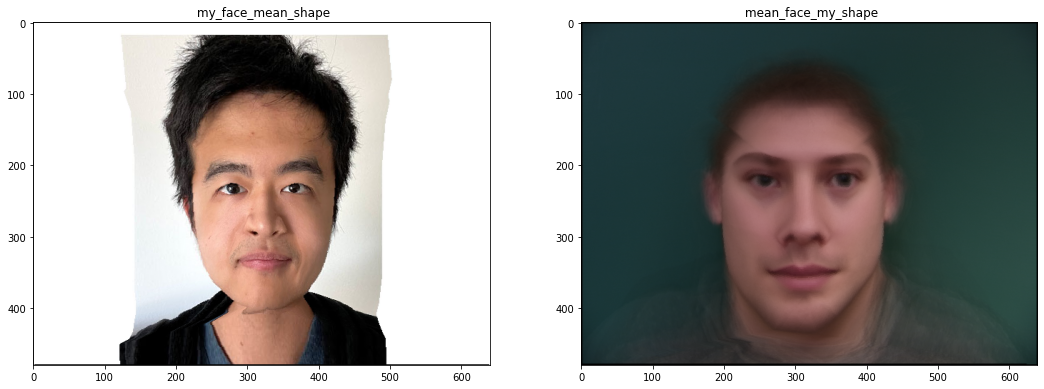

In [58]:
display_dictionary_of_images({'my_face_mean_shape':my_face_mean_shape,'mean_face_my_shape':mean_face_my_shape},w = 9, h=7, horiz=True)

Oh dear

## Charicature?

### Shape

In [59]:
# do the shape first
me_minus_mean = pts_me2 - avg_points
me_char = pts_me2 + me_minus_mean

In [60]:
my_face_exag_shape = morph(me2, me2, pts_me2, me_char, tri_danes, 0, 1)

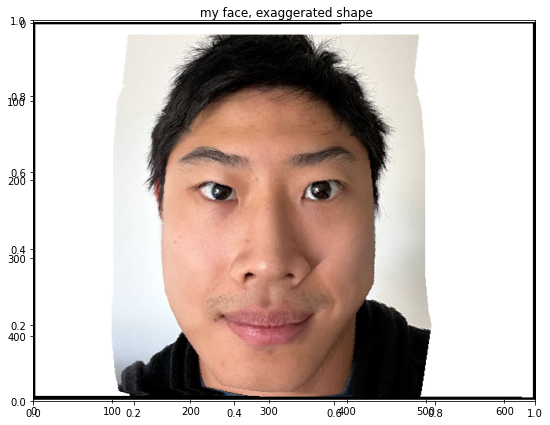

In [63]:
display_dictionary_of_images({'my face, exaggerated shape':my_face_exag_shape},w = 9, h=7, horiz=True)

### pixels

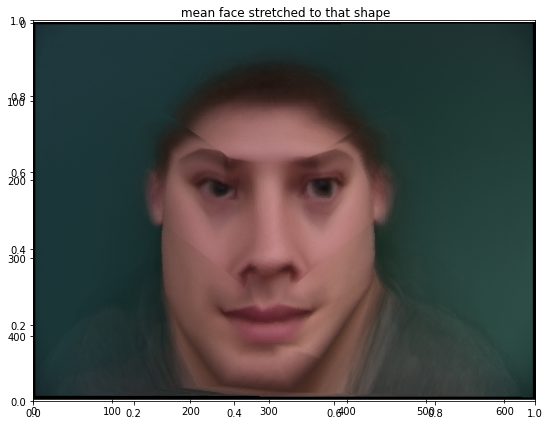

In [64]:
# morph mean to exaggerated shape
exag_mean_face = morph(mean_face, mean_face, avg_points, me_char, tri_danes, 0, 1)
display_dictionary_of_images({'mean face stretched to that shape':exag_mean_face},w = 9, h=7, horiz=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


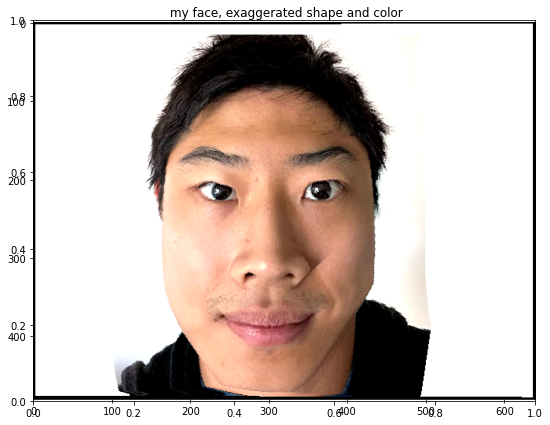

In [68]:
diff = my_face_exag_shape - exag_mean_face
my_face_exag_again = my_face_exag_shape + 0.3*diff
display_dictionary_of_images({'my face, exaggerated shape and color':my_face_exag_again},w = 9, h=7, horiz=True)

# Bells and whistles

## Changing gender

In [69]:
men = []
women = []
for filename in asf_files:
    df = pd.read_csv(filename, sep='\t',skiprows=list(range(16)) + list(range(75,80)), header=None)
    points = np.array(df[[2,3]])
    points = points * [640, 480]
    points = np.vstack((points, corner_points))
    img_name = filename[:-4]+'.bmp'
    img = sk.img_as_float(skio.imread(img_name))
    if filename[-5] == 'f':
        women.append({
            'points':points,
            'image':img
        })
    elif filename[-5] == 'm':
        men.append({
            'points':points,
            'image':img
        })
    else:
        print('huh?')

In [71]:
len(men), len(women)

(30, 7)

### Getting the mean points of men, women, and the difference

In [72]:
avg_points_men = np.zeros(shape = (62,2), dtype = float)
avg_points_women = np.zeros(shape = (62,2), dtype = float)
for picture in men:
    pts = picture['points']
    pts_normalized = pts/len(men)
    avg_points_men += pts_normalized
for picture in women:
    pts = picture['points']
    pts_normalized = pts/len(women)
    avg_points_women += pts_normalized


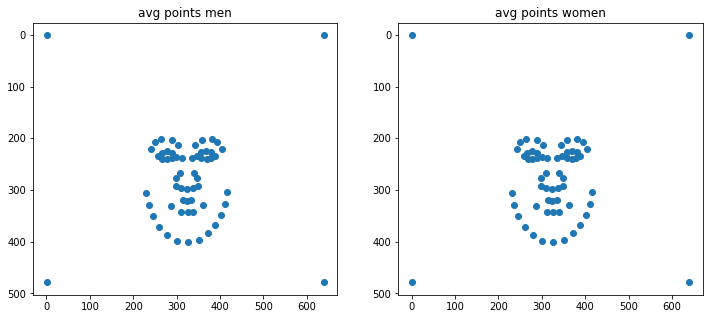

In [73]:
%matplotlib inline
fig = plt.figure(figsize=(12, 5))
subplots = fig.subplots(1, 2)
ax0, ax1 = subplots[0], subplots[1]
ax0.set_title('avg points men')
ax1.set_title('avg points women')

ax0.invert_yaxis()
ax1.invert_yaxis()

ax0.scatter(*zip(*avg_points))
ax1.scatter(*zip(*avg_points))

In [74]:
women_minus_men_shape = avg_points_women - avg_points_men

### Getting the mean pixels of men, women, warped to average. And the difference.

In [76]:
warped_to_avg_men = []
warped_to_avg_women =[]
for example in men:
    img = example['image']
    pts = example['points']
    
    warped = morph(img, img, pts, avg_points, tri_danes, 0, 1)
    warped_to_avg_men.append(warped)
for example in women:
    img = example['image']
    pts = example['points']
    
    warped = morph(img, img, pts, avg_points, tri_danes, 0, 1)
    warped_to_avg_women.append(warped)
mean_man_pixels = sum(warped_to_avg_men)/len(warped_to_avg_men)
mean_woman_pixels = sum(warped_to_avg_women)/len(warped_to_avg_women)

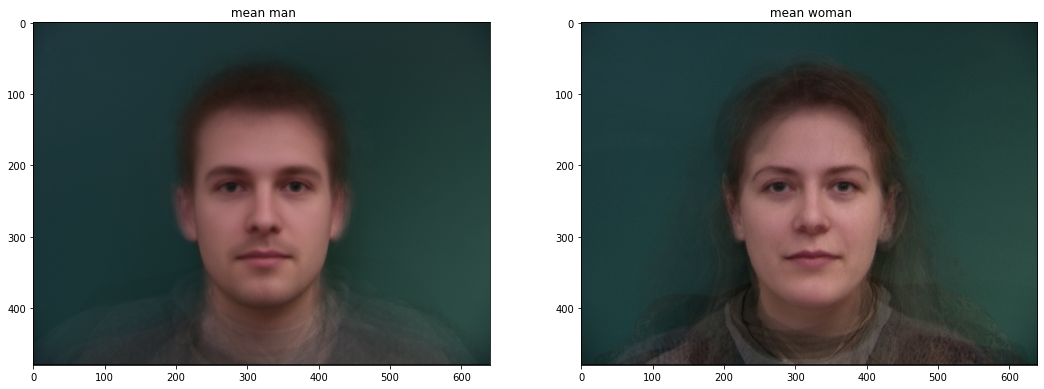

In [78]:
display_dictionary_of_images({'mean man':mean_man_pixels, 'mean woman' : mean_woman_pixels},w = 9, h=7, horiz = True)

In [79]:
women_minus_men_pixels = mean_woman_pixels - mean_man_pixels

### Morphing myself - shape only

Turning myself into a woman

In [90]:
my_face_woman_shape = morph(me2, me2, pts_me2, pts_me2+women_minus_men_shape, tri_danes, 0, 1)

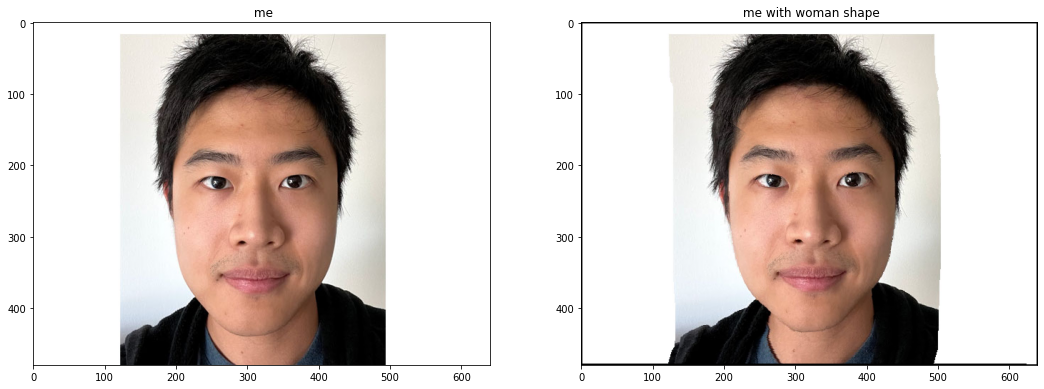

In [91]:
display_dictionary_of_images({'me':me2, 'me with woman shape' : my_face_woman_shape},w = 9, h=7, horiz = True)

### Morphing myself - pixels only

In [95]:
my_face_mean_shape_woman_pix = my_face_mean_shape + women_minus_men_pixels
my_face_woman_pixels = morph(my_face_mean_shape_woman_pix, my_face_mean_shape_woman_pix, avg_points, pts_me2, tri_danes, 0, 1)

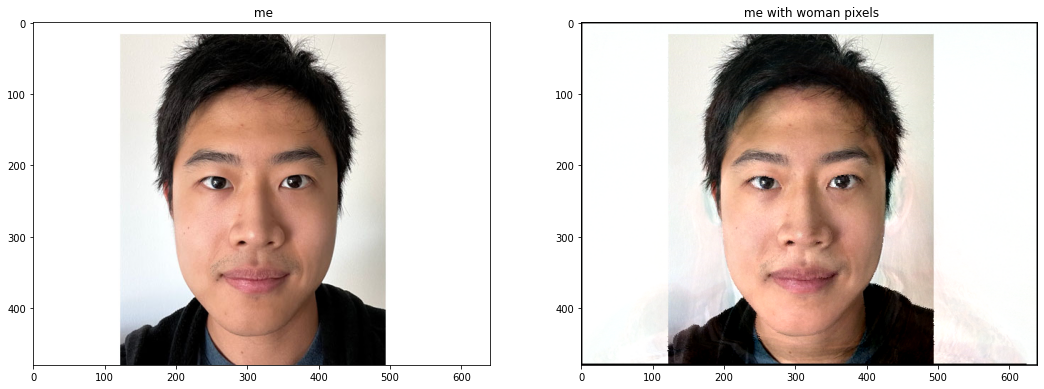

In [96]:
display_dictionary_of_images({'me':me2, 'me with woman pixels' : my_face_woman_pixels},w = 9, h=7, horiz = True)

Morphing myself - both

In [97]:
my_face_woman = morph(my_face_woman_pixels, my_face_woman_pixels, pts_me2, pts_me2+women_minus_men_shape, tri_danes, 0, 1)

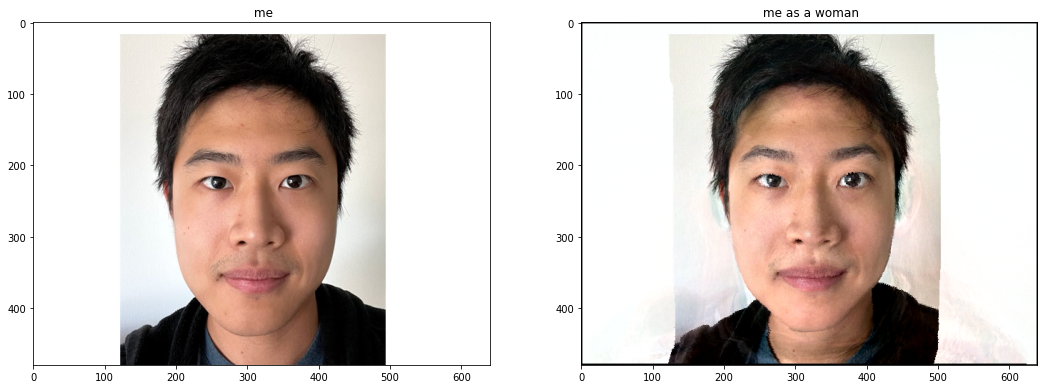

In [98]:
display_dictionary_of_images({'me':me2, 'me as a woman' : my_face_woman},w = 9, h=7, horiz = True)

# PCA!

In [201]:
len(warped_to_avg)

37

We do pca on the faces that are already warped to the average.

In [102]:
from sklearn.decomposition import PCA

In [210]:
warped_to_avg[0].flatten()

array([0.        , 0.        , 0.        , ..., 0.05098039, 0.17254902,
       0.14901961])

In [211]:
full_data_matrix = []
for face in warped_to_avg:
    full_data_matrix.append(face.flatten())
full_data_matrix.append(my_face_mean_shape.flatten())

In [213]:
full_data_matrix = np.array(full_data_matrix)

In [214]:
full_data_matrix.shape

(38, 921600)

In [232]:
pca = PCA(n_components=6)

In [233]:
pca.fit(full_data_matrix)

PCA(n_components=6)

In [234]:
print(pca.explained_variance_ratio_)

[0.5794234  0.15229951 0.03922743 0.03415807 0.01804124 0.01744239]


In [235]:
pca.components_

array([[ 9.13977460e-19, -4.01651476e-21,  8.81411683e-22, ...,
         1.41464225e-03,  1.28962529e-03,  1.29862656e-03],
       [ 5.96004643e-16, -4.28541284e-18,  6.13125831e-19, ...,
        -3.65369993e-05,  1.81962502e-04,  1.48908800e-04],
       [ 1.27870999e-15, -1.20556656e-16,  4.51524342e-17, ...,
        -2.17536352e-04, -2.95007173e-04, -3.11325974e-04],
       [ 3.21332291e-15, -9.09424473e-16, -1.29753501e-18, ...,
        -8.59845286e-04, -8.84896208e-04, -1.01863032e-03],
       [-1.08455914e-15, -4.13889014e-15,  5.21035174e-19, ...,
         2.39309126e-05,  4.58988588e-04,  3.08552004e-04],
       [-1.09868839e-15, -4.94154191e-15,  4.22312177e-16, ...,
         4.50675718e-04,  2.37544791e-04, -1.39273115e-04]])

In [236]:
pca_components = dict(zip([str(i) for i in range(6)], [np.reshape(arr, (480, 640, 3)) for arr in pca.components_]))

In [237]:
pca_components['2'].shape

(480, 640, 3)

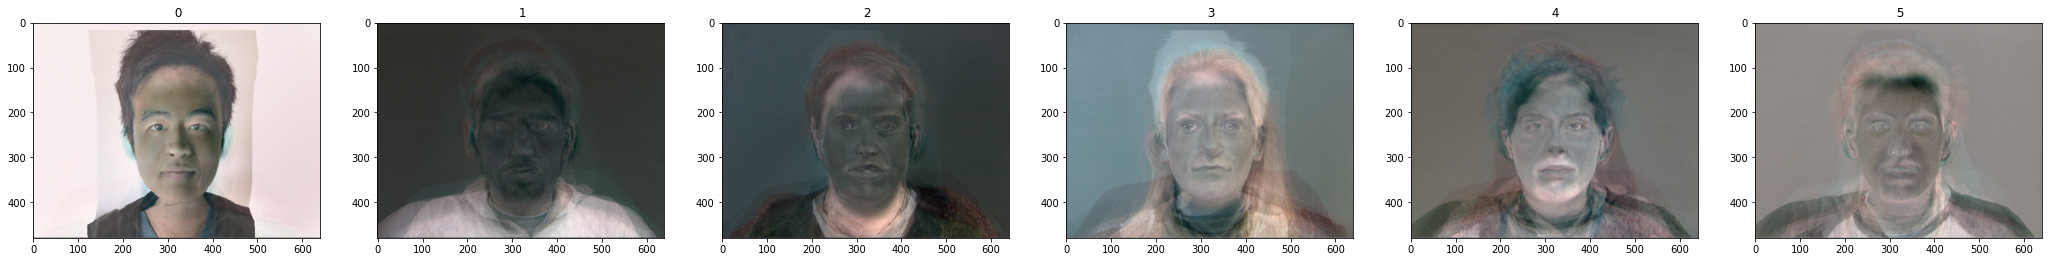

In [238]:
display_dictionary_of_images(pca_components, normalize_rgb = True, horiz = True)

get the coefficients for my own face

In [239]:
my_coefs = np.linalg.lstsq(pca.components_.T, my_face_mean_shape.flatten())[0]

In [240]:
my_coefs

array([775.98168662,  19.39916899,  66.29862941,  43.73038386,
        70.97378988, -41.56330815])

get the coefficients of the average face

In [241]:
avg_coefs = np.linalg.lstsq(pca.components_.T, mean_face.flatten())[0]

In [242]:
avg_coefs

array([159.69758576,  32.55009573,  78.05092065,  73.18884917,
        68.92953861, -46.70988823])

Get my exaggerated coefficients:

In [243]:
my_exag_coefs = my_coefs + (my_coefs - avg_coefs)

Reconstruct my exaggerated face from pca

In [244]:
me_exag_from_pca_mean_shape = (pca.components_.T @ my_exag_coefs).reshape((480,640,3))

In [245]:
me_exag_from_pca = morph(me_exag_from_pca_mean_shape, me2, avg_points, me_char, tri_danes, 0, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


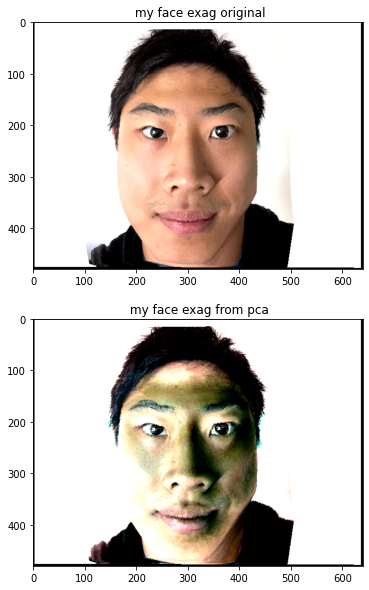

In [246]:
display_dictionary_of_images({'my face exag original': my_face_exag_again, 'my face exag from pca': me_exag_from_pca})